# Bayesian Data Analysis in Python

## Chapter 2

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import uniform, binom
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0, 11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0, 1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


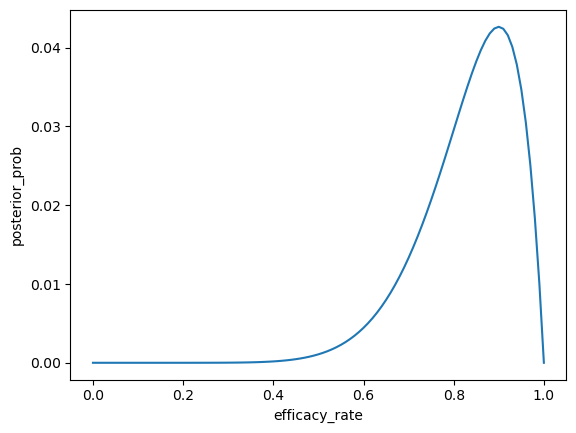

In [7]:
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9].copy()
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

# Plot the drug's posterior efficacy rate
sns.lineplot(x="efficacy_rate", y="posterior_prob", data=df_9_of_10_cured)
plt.show()

In [13]:
# df.describe()

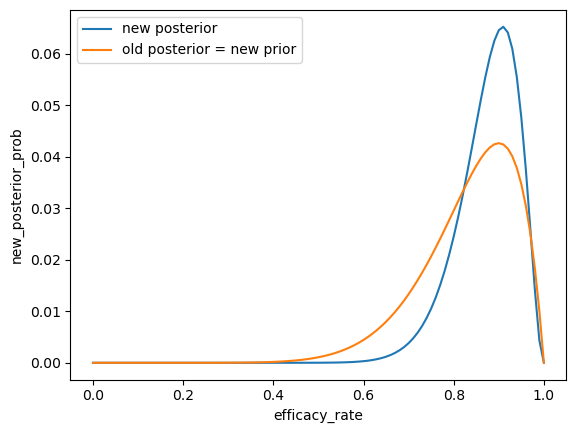

In [15]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10].copy()
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

sns.lineplot(x="efficacy_rate", y="new_posterior_prob", data=df_10_of_12_cured, label="new posterior")
sns.lineplot(x="efficacy_rate", y="posterior_prob", data=df_9_of_10_cured, label="old posterior = new prior")
plt.show()

The difference between these two distributions actually reflects what we have learned only from the data on the 12 new patients. The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.
Instead of using the old posterior as a new prior, we could have come up with our own prior belief about the efficacy rate in the first place.

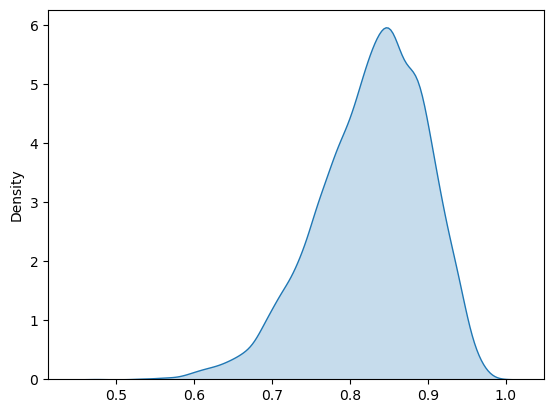

In [17]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, fill=True)
plt.show()

In [19]:
# Calculate the expected number of people cured
# cured_expected = np.mean(drug_efficacy_posterior_draws) * 100_000

# # Calculate the minimum number of people cured with 50% probability
# min_cured_50_perc = np.median(drug_efficacy_posterior_draws) * 100_000

# # Calculate the minimum number of people cured with 90% probability
# min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100_000

# # Print the filled-in memo
# print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

In [20]:
# # Import arviz as az
# import arviz as az

# # Calculate HPD credible interval of 90%
# ci_90 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.9)

# # Calculate HPD credible interval of 95%
# ci_95 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.95)

# # Print the memo
# print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

In [21]:
# The experimental results indicate that with a 90% probability 
# the new drug's efficacy rate is between 0.72 and 0.94, 
# and with a 95% probability it is between 0.7 and 0.95.
# In [1]:
# ci_90
# Out[1]:
# array([0.72006385, 0.93917822])
# In [2]:
# ci_95
# Out[2]:
# array([0.69600948, 0.95398974])

That's the Bayesian interpretation of a credible interval. Since the drug's true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: "the probability that it takes a particular value or that it lies in a particular interval is X%".